In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sys
import datetime as datetime
from datetime import datetime as dt
from datetime import timedelta as td
from datetime import date as dater

states = pd.read_csv(r'C:/Users/enoch/Desktop/MLvsCOVID/Jupyter Notebooks/allstates.csv')
states["date"]= pd.to_datetime(states["date"]) 
states['date'] = states['date'].dt.date
states=states.set_index(['state','date'])
states=states.sort_index()
states

retailandrec  groceryandpharm  parks  transit  work  \
state   date                                                              
Alabama 2020-03-13           7.0             32.0   26.0      7.0  -2.0   
        2020-03-14           1.0             28.0   55.0     12.0   4.0   
        2020-03-15          -7.0             16.0   16.0      6.0  -4.0   
        2020-03-16          -2.0             24.0   22.0      2.0 -10.0   
        2020-03-17         -11.0             17.0   25.0     -1.0 -17.0   
...                          ...              ...    ...      ...   ...   
Wyoming 2020-07-13          17.0             29.0  299.0     36.0 -25.0   
        2020-07-14          17.0             29.0  292.0     32.0 -24.0   
        2020-07-15          17.0             31.0  312.0     32.0 -24.0   
        2020-07-16          16.0             33.0  320.0     39.0 -25.0   
        2020-07-17           7.0             33.0    NaN     49.0 -26.0   

                    residential  cases  deaths  newcases  
state   date                                              
Alabama 2020-03-13          0.0      6       0       6.0  
        2020-03-14          0.0     12       0       6.0  
        2020-03-15          2.0     23       0      11.0  
        2020-03-16          4.0     29       0       6.0  
        2020-03-17          7.0     39       0      10.0  
...                         ...    ...     ...       ...  
Wyoming 2020-07-13          3.0   1903      21      41.0  
        2020-07-14          4.0   1951      22      48.0  
        2020-07-15          4.0   1985      22      34.0  
        2020-07-16          4.0   2026      24      41.0  
        2020-07-17          4.0   2069      24      43.0  

[6944 rows x 9 columns]

In [69]:
states.to_csv("completestates.csv")

In [3]:
def addnewcolumn():
    relevantdate = states.index.tolist() 
    bchanges =[]

    for date in relevantdate:
        today=states.loc[date[0]].loc[date[1]].newcases
        if(today<1):
            bchanges.append(0.1)
        else:
            bchanges.append(today)
    

   
    print(bchanges) 
    states['fixednewcases']=bchanges
addnewcolumn()

[6.0, 6.0, 11.0, 6.0, 10.0, 12.0, 27.0, 28.0, 25.0, 26.0, 39.0, 46.0, 144.0, 152.0, 101.0, 81.0, 110.0, 117.0, 52.0, 109.0, 162.0, 265.0, 97.0, 208.0, 165.0, 192.0, 301.0, 340.0, 170.0, 254.0, 321.0, 222.0, 148.0, 288.0, 163.0, 168.0, 151.0, 180.0, 175.0, 249.0, 283.0, 222.0, 194.0, 187.0, 208.0, 118.0, 211.0, 175.0, 143.0, 226.0, 317.0, 277.0, 224.0, 325.0, 254.0, 355.0, 339.0, 283.0, 221.0, 275.0, 300.0, 236.0, 401.0, 272.0, 301.0, 97.0, 315.0, 290.0, 676.0, 362.0, 256.0, 479.0, 329.0, 508.0, 664.0, 382.0, 498.0, 501.0, 328.0, 593.0, 582.0, 237.0, 80.0, 221.0, 315.0, 656.0, 457.0, 425.0, 497.0, 567.0, 856.0, 865.0, 891.0, 1014.0, 657.0, 640.0, 400.0, 894.0, 796.0, 547.0, 472.0, 433.0, 643.0, 967.0, 1142.0, 977.0, 900.0, 358.0, 1734.0, 870.0, 917.0, 1149.0, 1754.0, 997.0, 1091.0, 925.0, 907.0, 1177.0, 2212.0, 1334.0, 1439.0, 1640.0, 1958.0, 1710.0, 1812.0, 2021.0, 2003.0, 1.0, 0.1, 0.1, 0.1, 2.0, 3.0, 3.0, 3.0, 2.0, 7.0, 1.0, 14.0, 6.0, 17.0, 10.0, 16.0, 17.0, 12.0, 6.0, 13.0, 10.0, 3

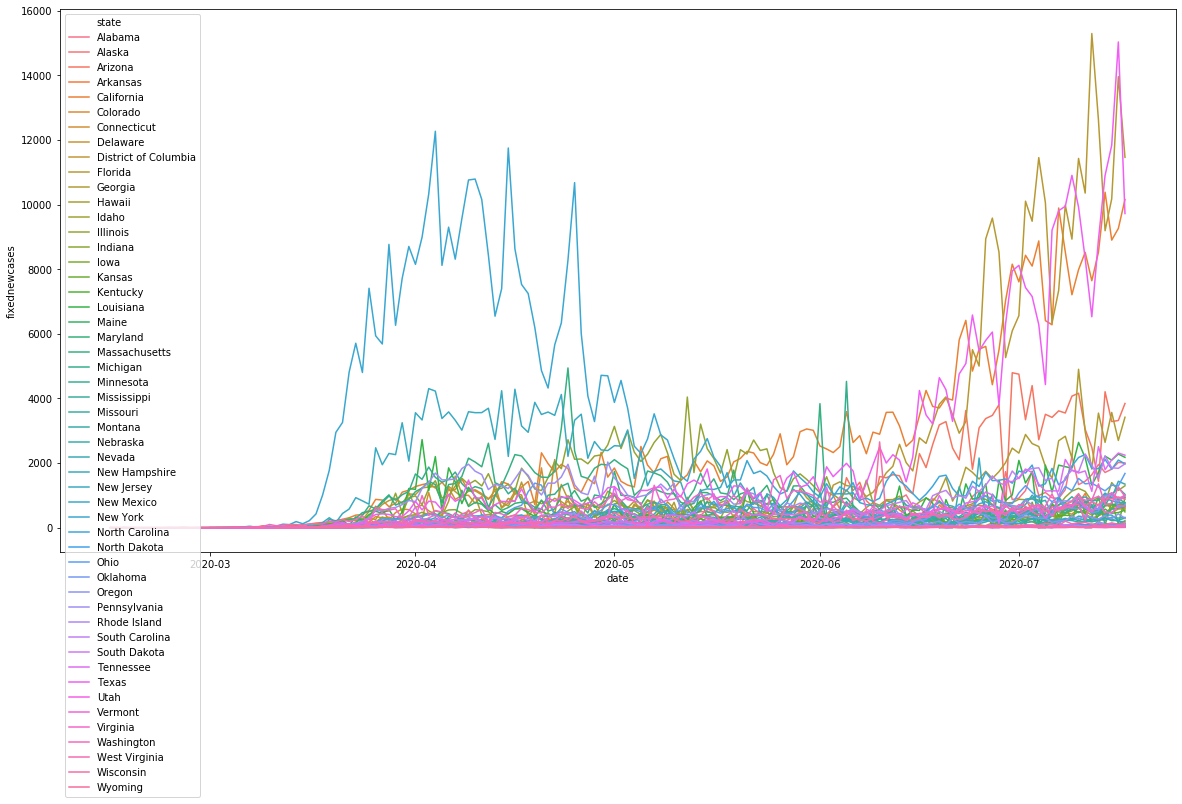

In [4]:
graph=states.reset_index()
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='fixednewcases',hue='state',data=graph)

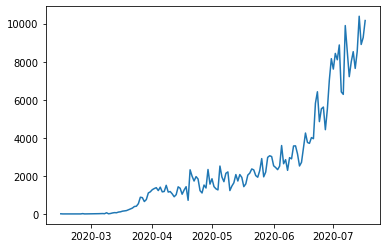

In [5]:
cali=states.loc['California']
sns.lineplot(data=cali['newcases'])

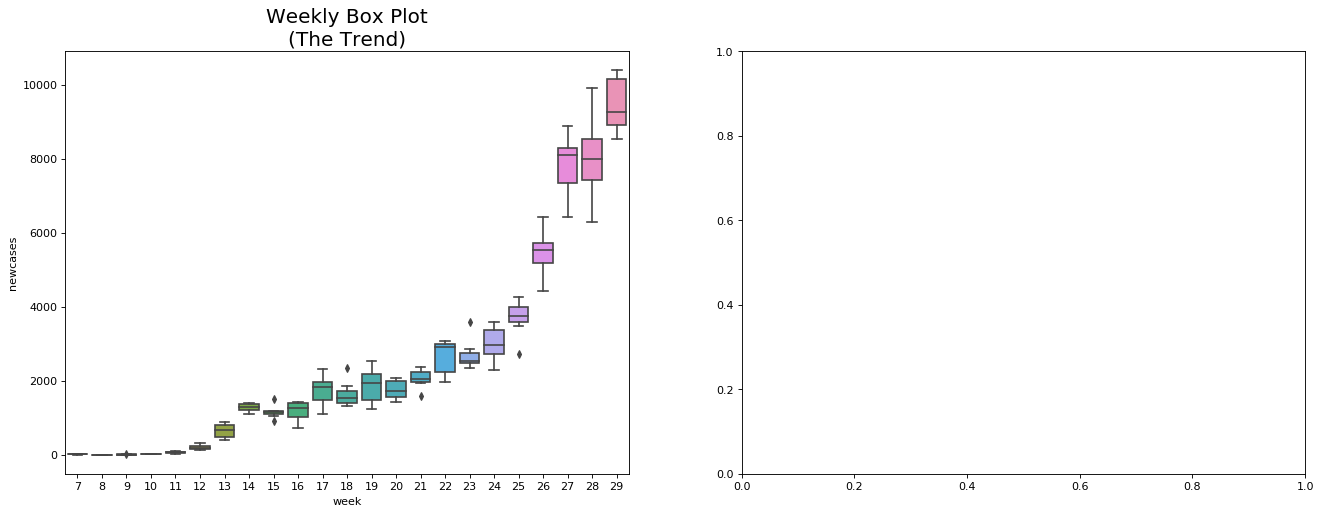

In [6]:
caligraph=cali.reset_index()
caligraph['week'] = [a_date.isocalendar()[1] for a_date in caligraph.date]

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='week', y='newcases', data=caligraph, ax=axes[0])

# Set Title
axes[0].set_title('Weekly Box Plot\n(The Trend)', fontsize=18); 


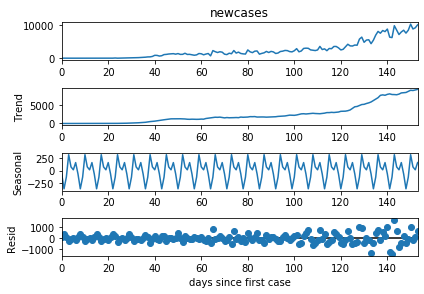

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

df=caligraph


result = seasonal_decompose(df['newcases'], model='', extrapolate_trend='freq',period=7)

# Plot
result.plot()
plt.rcParams.update({'figure.figsize': (10,10)})
plt.xlabel("days since first case")
plt.show()

In [111]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(cali.fixednewcases)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.533587
p-value: 1.000000


date
2020-02-15        7.0
2020-02-16        0.0
2020-02-17        0.0
2020-02-18        0.0
2020-02-19        0.0
               ...   
2020-07-13     8530.0
2020-07-14    10387.0
2020-07-15     8904.0
2020-07-16     9264.0
2020-07-17    10161.0
Name: newcases, Length: 154, dtype: float64


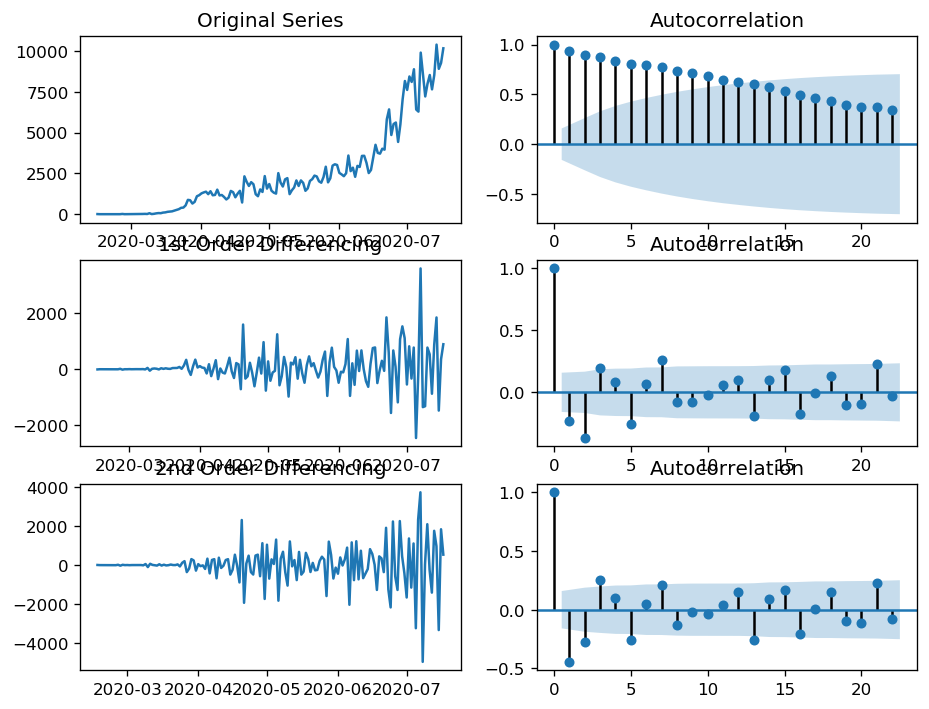

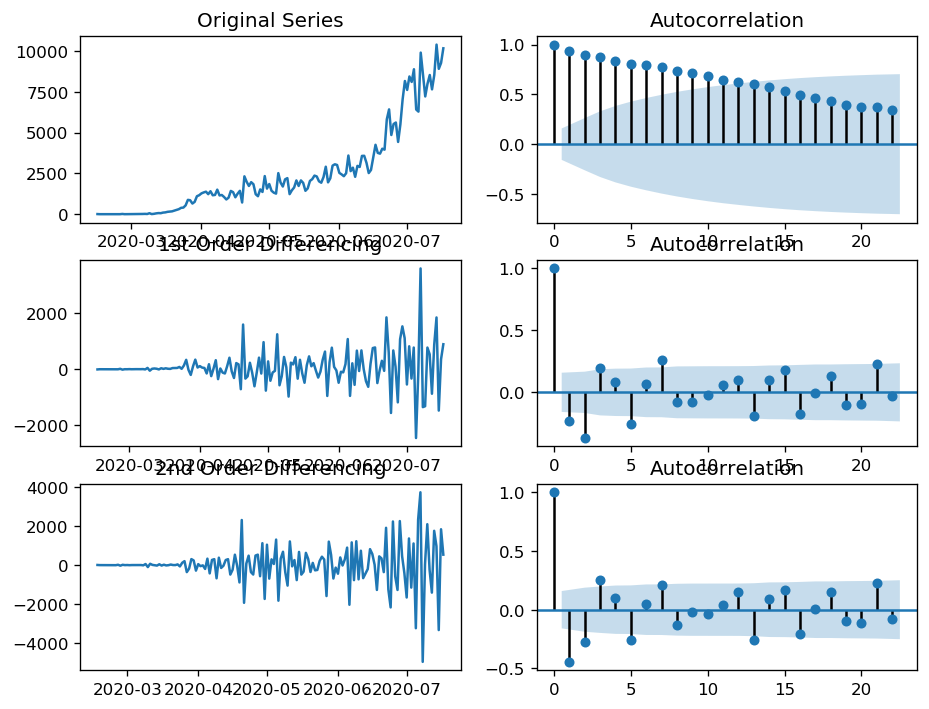

In [141]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

df=cali['newcases']
print(df)

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df)
axes[0, 0].set_title('Original Series')
plot_acf(df, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.diff().diff().dropna(), ax=axes[2, 1])



In [9]:
from pmdarima.arima.utils import ndiffs


## Adf Test
ndiffs(df, test='adf')  # 2

# KPSS test
ndiffs(df, test='kpss')  # 0

# PP test:
ndiffs(df, test='pp')  # 2

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
!conda install pmdarima

In [148]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y=df
train, test = train_test_split(y, train_size=80)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=7)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:80], train, c='blue')
plt.plot(x[80:], forecasts, c='green')
plt.show()

ModuleNotFoundError: No module named 'pmdarima'

In [62]:
def addnewcolumn():
    relevantdate = states.index.tolist() 
    bchanges =[]

    for date in relevantdate:
        todaytotal=states.loc[date[0]].loc[date[1]].cases
        try:
            newdate = dt.strptime(date[1], '%Y-%m-%d')-td(days=1)
            if(todaytotal-states.loc[date[0]].loc[str(newdate)[0:10]].cases)<1:
                bchanges.append(0.1)
            else:
                bchanges.append((todaytotal-states.loc[date[0]].loc[str(newdate)[0:10]].cases))
            
        except:
            if(todaytotal)<1:
                bchanges.append(0.1)
            else:
                bchanges.append(todaytotal)
    

   
    print(bchanges) 
    states['newcases']=bchanges
addnewcolumn()

[6.0, 12.0, 23.0, 29.0, 39.0, 51.0, 78.0, 106.0, 131.0, 157.0, 196.0, 242.0, 386.0, 538.0, 639.0, 720.0, 830.0, 947.0, 999.0, 1108.0, 1270.0, 1535.0, 1632.0, 1840.0, 2005.0, 2197.0, 2498.0, 2838.0, 3008.0, 3262.0, 3583.0, 3805.0, 3953.0, 4241.0, 4404.0, 4572.0, 4723.0, 4903.0, 5078.0, 5327.0, 5610.0, 5832.0, 6026.0, 6213.0, 6421.0, 6539.0, 6750.0, 6925.0, 7068.0, 7294.0, 7611.0, 7888.0, 8112.0, 8437.0, 8691.0, 9046.0, 9385.0, 9668.0, 9889.0, 10164.0, 10464.0, 10700.0, 11101.0, 11373.0, 11674.0, 11771.0, 12086.0, 12376.0, 13052.0, 13414.0, 13670.0, 14149.0, 14478.0, 14986.0, 15650.0, 16032.0, 16530.0, 17031.0, 17359.0, 17952.0, 18534.0, 18771.0, 18851.0, 19072.0, 19387.0, 20043.0, 20500.0, 20925.0, 21422.0, 21989.0, 22845.0, 23710.0, 24601.0, 25615.0, 26272.0, 26912.0, 27312.0, 28206.0, 29002.0, 29549.0, 30021.0, 30454.0, 31097.0, 32064.0, 33206.0, 34183.0, 35083.0, 35441.0, 37175.0, 38045.0, 38962.0, 40111.0, 41865.0, 42862.0, 43953.0, 44878.0, 45785.0, 46962.0, 49174.0, 50508.0, 51947